# Estrutura base das competências:
## Competências:
    - Conhecimentos (C)
    - Habilidades   (H)
    - Atitudes      (A)
    Fonte: Fleury e Fleury (2001)

# Estrutura das avaliação de Desempenho baseada em Fleury e Fleury (2001) e Chiavenato (2014):
## Competência 1..N:
    - Conhecimentos 1..N
        Avaliadores:
            Auto avaliação (AV)  Gestor (AG)
                Nota          Nota
    - Habilidades   1..N
            Auto avaliação (AV)  Gestor (AG)
                Nota          Nota
    - Atitudes      1..N
            Auto avaliação (AV)  Gestor (AG)
                Nota          Nota

# Estrutura das avaliações de Desempenho do Coblue:
## Competência 1..N:
    - Comportamentos 1..N
        Avaliadores:
            Auto avaliação  Gestor
                Nota          Nota
            
PS: No Coblue não há distinção entre os C.H.A, eles são tratados como uma coisa só (comportamentos).

# Fórmulas aplicadas
- Desempenho geral das competências da empresa (DGCE): AVG(DGUCE*)
- Desempenho geral de uma competência da empresa (DGUCE): AVG(DC*)
- Desempenho geral das competências por colaborador (DGCC): AVG(DC*)
- Desempenho de uma competência por colaborador (DC): AVG(DCO) 
- Desempenho de um comportamento por colaborador (DCO): (AV + AG) / 2

# Análise dos Conhecimentos, Habilidades e Atitudes (Comportamentos no Coblue)

In [100]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as plx
import matplotlib.pyplot as plt
from IPython.display import display, HTML, Image

# Necessário para que campos com textos muito grandes
# não sejam truncados na apresentação dos resultados
# https://stackoverflow.com/questions/25351968/how-can-i-display-full-non-truncated-dataframe-information-in-html-when-conver
pd.set_option('display.max_colwidth', None)

# A organização considerada fez avaliação de outros assuntos que não são diretamente
# relacionados a competências, aqui eu filtro apenas as categorias relacionados ao
# meu objeto de estudo: Competências.
def filter_only_the_experiment_categories(df):
    return df[(df['category_id'] == 1) | (df['category_id'] == 8)]


# Lê o arquivo Excel com as notas dos avaliadores do usuário em cada comportamento
# Cada linha do DataFrame representa as notas do usuário em um comportamento específico
df_behaviors = pd.read_excel('data.xlsx', sheet_name='keyBehaviors')

# Remove colunas que não interessam para o experimento
df_behaviors = df_behaviors.drop([
    'score',
    'rating_score',
    'self_rating_score',
    'leader_rating_score'
], axis=1)

# Remove dados que não serão analisados
df_behaviors = filter_only_the_experiment_categories(df_behaviors)

# Renomeia colunas para melhor entendimento
df_behaviors = df_behaviors.rename(columns={
    'key_behavior_id': 'behavior_id',
    'key_behavior_title': 'behavior_title',
    'value_id': 'competency_id',
    'value_title': 'competency_title',
})

# Padroniza o nome das competências
df_behaviors.competency_title = df_behaviors \
    .competency_title \
    .apply(
        lambda title: title.replace('*', '').strip()
    )

# Mostra o DataFrame
display(df_behaviors)


,user_id,questionnaire_id,category_id,category_title,competency_id,competency_title,behavior_id,behavior_title,self_score,leader_score
4,6470,76,1,Competências 2020,23,Colaboração,87,"Integra as pessoas que são importantes para o tema ou situação que está sendo tratada, soma conhecimento e gera sinergia entre as áreas, visando o melhor resultado para a empresa.",1.0,1.0
5,6470,76,1,Competências 2020,24,Protagonismo,88,"Faz a diferença e encara seus desafios, assume suas responsabilidades e compartilha do propósito da empresa.",1.0,1.0
6,6470,76,1,Competências 2020,25,Comunicação,89,"É claro e objetivo nos relacionamentos, sabendo ouvir atentamente e tendo a transparência como alicerce de parcerias saudáveis e duradouras.",1.0,1.0
7,6470,76,1,Competências 2020,26,Servir ao Cliente,90,"É orientado para atender as necessidades dos clientes de acordo com a estratégia da organização, propondo soluções que otimizem recursos e promovam resultados.",1.0,1.0
8,6470,76,1,Competências 2020,27,Criatividade,91,"Se apegar ao novo e as mudanças do mercado, consegue agir e pensar diferente, sugerindo alternativas e com foco nos resultados.",0.8,1.0
...,...,...,...,...,...,...,...,...,...,...
8300,6607,113,8,Competências 2021,58,Engajamento,135,"É engajado em sua transformação, aprende a trabalhar nela e assim constrói uma agenda positiva e de integração a nova realidade. Acredita que o engajamento começa por uma conexão genuína ao proposito que nos move, que dá significado ao nosso trabalho e fortalece nossa liderança.",0.4,0.6
8301,6607,113,8,Competências 2021,53,Orientação para Servir,129,"É sensível para saber como atender e agir de maneira ética, adaptando o discurso quando necessário e assim ajudar e orientar o cliente",0.6,0.6
8302,6607,113,8,Competências 2021,46,Inteligência Emocional,131,"Se expressa e controla as emoções próprias e de outros, ajuda de forma relevante a navegar em tempos de incertezas e de desafios em longo prazo. É resiliente, sabe colaborar de maneira efetiva, construindo uma visão com clareza e assertividade nas ações frente a alta volatilidade, ambiguidade e complexidade.",0.4,0.4
8303,6607,113,8,Competências 2021,49,Adaptabilidade e Flexibilidade Cognitiva,134,Adaptar-se facilmente às mudanças assim como é flexível para mudar pensamentos em relação a novos problemas e situações que emergem.,0.6,0.4


In [101]:
# O tipo de dado de cada coluna
display(df_behaviors.dtypes)

user_id               int64
questionnaire_id      int64
category_id           int64
category_title       object
competency_id         int64
competency_title     object
behavior_id           int64
behavior_title       object
self_score          float64
leader_score        float64
dtype: object

### Informações gerais dos processos de Avaliação Desempenho considerados

Quantidade total processos de avaliação realizados:

In [102]:
display(len(df_behaviors.questionnaire_id.unique()))

10

Quantidade total de colaborados avaliados:

In [103]:
display(len(df_behaviors.user_id.unique()))

253

Quantidade total de competências avaliadas: 

In [104]:
display(len(df_behaviors.competency_id.unique()))

18

Quantidade de notas por competência:

In [105]:
df_behaviors.groupby('competency_id') \
    .aggregate({
        'competency_title': 'first',
        'user_id': 'count'
    }) \
    .reset_index() \
    .rename(columns={'user_id': 'count'}) \
    .sort_values(by='count')


,competency_id,competency_title,count
7,30,Liderança,74
17,62,Comunicação,231
13,53,Orientação para Servir,231
11,51,Colaboração,231
14,56,Liderança e Influência Social,237
12,52,Análise de Dados e Habilidade Digital,237
10,50,Pensamento Crítico e Habilidade de Resolver Problemas Complexos,237
0,23,Colaboração,412
5,28,Flexibilidade e Adaptabilidade,412
4,27,Criatividade,412


Quantidade total de perguntas feitas:

In [106]:
len(df_behaviors.behavior_id.unique())

18

### Adiciona a coluna com a nota final do colaborador no comportamento baseado nas notas das redes de avaliadores:
### - Desempenho de um comportamento do colaborador (DCO): (AV + AG) / 2

## Definição da função que calcula a nota final do colaborador em uma pergunta específica realizando a média entre as notas de cada rede de avaliador:

In [107]:
def calculate_final_score(row):
    total = 0
    count = 0

    if math.isnan(row.self_score) == False:
        total += row.self_score
        count += 1

    if math.isnan(row.leader_score) == False:
        total += row.leader_score
        count += 1

    return total / count

## Adicionando a nota final do colaborador em cada questão

In [108]:
df_behaviors['final_score'] = df_behaviors.apply(
    calculate_final_score,
    axis=1
)

display(df_behaviors)

,user_id,questionnaire_id,category_id,category_title,competency_id,competency_title,behavior_id,behavior_title,self_score,leader_score,final_score
4,6470,76,1,Competências 2020,23,Colaboração,87,"Integra as pessoas que são importantes para o tema ou situação que está sendo tratada, soma conhecimento e gera sinergia entre as áreas, visando o melhor resultado para a empresa.",1.0,1.0,1.0
5,6470,76,1,Competências 2020,24,Protagonismo,88,"Faz a diferença e encara seus desafios, assume suas responsabilidades e compartilha do propósito da empresa.",1.0,1.0,1.0
6,6470,76,1,Competências 2020,25,Comunicação,89,"É claro e objetivo nos relacionamentos, sabendo ouvir atentamente e tendo a transparência como alicerce de parcerias saudáveis e duradouras.",1.0,1.0,1.0
7,6470,76,1,Competências 2020,26,Servir ao Cliente,90,"É orientado para atender as necessidades dos clientes de acordo com a estratégia da organização, propondo soluções que otimizem recursos e promovam resultados.",1.0,1.0,1.0
8,6470,76,1,Competências 2020,27,Criatividade,91,"Se apegar ao novo e as mudanças do mercado, consegue agir e pensar diferente, sugerindo alternativas e com foco nos resultados.",0.8,1.0,0.9
...,...,...,...,...,...,...,...,...,...,...,...
8300,6607,113,8,Competências 2021,58,Engajamento,135,"É engajado em sua transformação, aprende a trabalhar nela e assim constrói uma agenda positiva e de integração a nova realidade. Acredita que o engajamento começa por uma conexão genuína ao proposito que nos move, que dá significado ao nosso trabalho e fortalece nossa liderança.",0.4,0.6,0.5
8301,6607,113,8,Competências 2021,53,Orientação para Servir,129,"É sensível para saber como atender e agir de maneira ética, adaptando o discurso quando necessário e assim ajudar e orientar o cliente",0.6,0.6,0.6
8302,6607,113,8,Competências 2021,46,Inteligência Emocional,131,"Se expressa e controla as emoções próprias e de outros, ajuda de forma relevante a navegar em tempos de incertezas e de desafios em longo prazo. É resiliente, sabe colaborar de maneira efetiva, construindo uma visão com clareza e assertividade nas ações frente a alta volatilidade, ambiguidade e complexidade.",0.4,0.4,0.4
8303,6607,113,8,Competências 2021,49,Adaptabilidade e Flexibilidade Cognitiva,134,Adaptar-se facilmente às mudanças assim como é flexível para mudar pensamentos em relação a novos problemas e situações que emergem.,0.6,0.4,0.5


In [109]:
def get_behavior_statistics_by_score_type(score_type):
    return df_behaviors.groupby('behavior_id') \
        .agg({
            'behavior_title': 'first',
            score_type: [
                'mean',
                ('mode', lambda x: x.mode()),
                'median',
                ('variance', 'var'),
                'std',
                'min',
                'max', ('range', lambda x: x.max() - x.min())
            ],
        }) \
        .droplevel(axis=1, level=0) \
        .reset_index() \
        .rename(columns={'first': 'behavior_title'}) \
        .sort_values(by=['mean'], ascending=False)


### Estatísticas das perguntas com base nas notas de autoavaliação

In [110]:
display(get_behavior_statistics_by_score_type('self_score'))

,behavior_id,behavior_title,mean,mode,median,variance,std,min,max,range
3,90,"É orientado para atender as necessidades dos clientes de acordo com a estratégia da organização, propondo soluções que otimizem recursos e promovam resultados.",0.910995,1.0,1.0,0.020404,0.142842,0.4,1.0,0.6
9,129,"É sensível para saber como atender e agir de maneira ética, adaptando o discurso quando necessário e assim ajudar e orientar o cliente",0.888442,1.0,1.0,0.024462,0.156402,0.4,1.0,0.6
2,89,"É claro e objetivo nos relacionamentos, sabendo ouvir atentamente e tendo a transparência como alicerce de parcerias saudáveis e duradouras.",0.887435,1.0,1.0,0.022466,0.149888,0.4,1.0,0.6
7,94,"Identifica necessidades e talentos individuais, desenvolve pessoas e conduz o grupo para a resolução de problemas e alcance de resultados.",0.882192,1.0,1.0,0.019817,0.140774,0.6,1.0,0.4
1,88,"Faz a diferença e encara seus desafios, assume suas responsabilidades e compartilha do propósito da empresa.",0.880628,1.0,1.0,0.030227,0.173860,0.2,1.0,0.8
17,142,"É claro e objetivo nos relacionamentos, sabendo ouvir atentamente e tendo a transparência como alicerce de parcerias saudáveis e duradouras.",0.871357,1.0,1.0,0.029428,0.171546,0.4,1.0,0.6
0,87,"Integra as pessoas que são importantes para o tema ou situação que está sendo tratada, soma conhecimento e gera sinergia entre as áreas, visando o melhor resultado para a empresa.",0.863351,1.0,1.0,0.035346,0.188006,0.0,1.0,1.0
11,134,Adaptar-se facilmente às mudanças assim como é flexível para mudar pensamentos em relação a novos problemas e situações que emergem.,0.862588,1.0,1.0,0.026356,0.162347,0.4,1.0,0.6
12,135,"É engajado em sua transformação, aprende a trabalhar nela e assim constrói uma agenda positiva e de integração a nova realidade. Acredita que o engajamento começa por uma conexão genuína ao proposito que nos move, que dá significado ao nosso trabalho e fortalece nossa liderança.",0.853647,1.0,1.0,0.031832,0.178416,0.2,1.0,0.8
5,92,"Adapta-se ao contexto de constante mudança e transformação, tendo uma abordagem diferenciada para a obtenção de resultados.",0.853403,1.0,0.8,0.030316,0.174116,0.0,1.0,1.0


### Estatísticas das perguntas baseadas nas notas dos gestores

In [111]:
display(get_behavior_statistics_by_score_type('leader_score'))

,behavior_id,behavior_title,mean,mode,median,variance,std,min,max,range
7,94,"Identifica necessidades e talentos individuais, desenvolve pessoas e conduz o grupo para a resolução de problemas e alcance de resultados.",0.902703,1.0,1.0,0.018897,0.137465,0.6,1.0,0.4
5,92,"Adapta-se ao contexto de constante mudança e transformação, tendo uma abordagem diferenciada para a obtenção de resultados.",0.895122,1.0,1.0,0.022715,0.150713,0.2,1.0,0.8
3,90,"É orientado para atender as necessidades dos clientes de acordo com a estratégia da organização, propondo soluções que otimizem recursos e promovam resultados.",0.884878,1.0,1.0,0.024270,0.155787,0.2,1.0,0.8
11,134,Adaptar-se facilmente às mudanças assim como é flexível para mudar pensamentos em relação a novos problemas e situações que emergem.,0.884233,1.0,1.0,0.022067,0.148549,0.4,1.0,0.6
9,129,"É sensível para saber como atender e agir de maneira ética, adaptando o discurso quando necessário e assim ajudar e orientar o cliente",0.875221,1.0,1.0,0.025428,0.159461,0.4,1.0,0.6
0,87,"Integra as pessoas que são importantes para o tema ou situação que está sendo tratada, soma conhecimento e gera sinergia entre as áreas, visando o melhor resultado para a empresa.",0.874634,1.0,1.0,0.026788,0.163670,0.2,1.0,0.8
14,137,"Integra pessoas que são importantes para o tema ou situação que está sendo tratada, somando conhecimento e gerando sinergia entre as áreas, visando o melhor resultado para empresa.",0.866372,1.0,1.0,0.027753,0.166592,0.4,1.0,0.6
12,135,"É engajado em sua transformação, aprende a trabalhar nela e assim constrói uma agenda positiva e de integração a nova realidade. Acredita que o engajamento começa por uma conexão genuína ao proposito que nos move, que dá significado ao nosso trabalho e fortalece nossa liderança.",0.858963,1.0,1.0,0.029957,0.173082,0.4,1.0,0.6
1,88,"Faz a diferença e encara seus desafios, assume suas responsabilidades e compartilha do propósito da empresa.",0.849756,1.0,0.8,0.029988,0.173170,0.2,1.0,0.8
17,142,"É claro e objetivo nos relacionamentos, sabendo ouvir atentamente e tendo a transparência como alicerce de parcerias saudáveis e duradouras.",0.841593,1.0,0.8,0.025107,0.158451,0.4,1.0,0.6


### Estatísticas das questões baseadas na nota final dos colaboradores

In [112]:
display(get_behavior_statistics_by_score_type('final_score'))

,behavior_id,behavior_title,mean,mode,median,variance,std,min,max,range
3,90,"É orientado para atender as necessidades dos clientes de acordo com a estratégia da organização, propondo soluções que otimizem recursos e promovam resultados.",0.895874,1.0,0.9,0.014411,0.120046,0.4,1.0,0.6
7,94,"Identifica necessidades e talentos individuais, desenvolve pessoas e conduz o grupo para a resolução de problemas e alcance de resultados.",0.893243,1.0,0.9,0.010776,0.103806,0.6,1.0,0.4
9,129,"É sensível para saber como atender e agir de maneira ética, adaptando o discurso quando necessário e assim ajudar e orientar o cliente",0.880952,1.0,0.9,0.016331,0.127794,0.4,1.0,0.6
5,92,"Adapta-se ao contexto de constante mudança e transformação, tendo uma abordagem diferenciada para a obtenção de resultados.",0.873786,1.0,0.9,0.015856,0.125921,0.4,1.0,0.6
11,134,Adaptar-se facilmente às mudanças assim como é flexível para mudar pensamentos em relação a novos problemas e situações que emergem.,0.872222,1.0,0.9,0.015073,0.122770,0.4,1.0,0.6
0,87,"Integra as pessoas que são importantes para o tema ou situação que está sendo tratada, soma conhecimento e gera sinergia entre as áreas, visando o melhor resultado para a empresa.",0.868447,1.0,0.9,0.019148,0.138376,0.4,1.0,0.6
1,88,"Faz a diferença e encara seus desafios, assume suas responsabilidades e compartilha do propósito da empresa.",0.861893,1.0,0.9,0.019493,0.139618,0.4,1.0,0.6
2,89,"É claro e objetivo nos relacionamentos, sabendo ouvir atentamente e tendo a transparência como alicerce de parcerias saudáveis e duradouras.",0.860316,0.9,0.9,0.015532,0.124628,0.4,1.0,0.6
17,142,"É claro e objetivo nos relacionamentos, sabendo ouvir atentamente e tendo a transparência como alicerce de parcerias saudáveis e duradouras.",0.854978,1.0,0.9,0.018051,0.134355,0.5,1.0,0.5
14,137,"Integra pessoas que são importantes para o tema ou situação que está sendo tratada, somando conhecimento e gerando sinergia entre as áreas, visando o melhor resultado para empresa.",0.852814,1.0,0.9,0.020242,0.142275,0.4,1.0,0.6


### Definindo as notas de cada competência por avaliado
#### Desempenho de uma competência do colaborador (DC): AVG(DCO)

In [113]:
df_competencies = df_behaviors \
    .groupby(['user_id', 'competency_id'], as_index=False) \
    .agg({
        'category_id' : 'first',
        'category_title': 'first',
        'competency_title': 'first',
        'self_score': 'mean',
        'leader_score': 'mean',
        'final_score': 'mean'
    })

display(df_competencies)

,user_id,competency_id,category_id,category_title,competency_title,self_score,leader_score,final_score
0,18,23,1,Competências 2020,Colaboração,0.9,1.0,0.95
1,18,24,1,Competências 2020,Protagonismo,0.9,1.0,0.95
2,18,25,1,Competências 2020,Comunicação,0.9,1.0,0.95
3,18,26,1,Competências 2020,Servir ao Cliente,0.9,1.0,0.95
4,18,27,1,Competências 2020,Criatividade,0.8,0.8,0.80
...,...,...,...,...,...,...,...,...
3405,6922,50,8,Competências 2021,Pensamento Crítico e Habilidade de Resolver Problemas Complexos,0.8,0.8,0.80
3406,6922,52,8,Competências 2021,Análise de Dados e Habilidade Digital,0.8,0.6,0.70
3407,6922,56,8,Competências 2021,Liderança e Influência Social,1.0,0.8,0.90
3408,6922,58,8,Competências 2021,Engajamento,1.0,1.0,1.00


# Estatísticas das competências

## Definição da função que calcula as estatísticas das notas das competências

In [114]:
def get_competency_statistics_by_score_type(data_frame, score_type):
    result = data_frame.groupby(['competency_id', 'category_id']) \
        .agg({
            'competency_title': 'first',
            'category_title': 'first',
            score_type: [
                'mean',
                ('mode', lambda x: x.mode()),
                'median',
                ('variance', 'var'),
                'std',
                'min',
                'max', ('range', lambda x: x.max() - x.min())
            ],
        }) \
        .droplevel(axis=1, level=0) \
        .reset_index()

    columns = result.columns.to_list()
    columns[2] = 'competency_title'
    columns[3] = 'category_title'

    result.columns = columns

    return result.sort_values(by=['competency_title'], ascending=False)

## Estatísticas das notas de autoavaliação:

In [115]:
get_competency_statistics_by_score_type(df_competencies, 'self_score')

,competency_id,category_id,competency_title,category_title,mean,mode,median,variance,std,min,max,range
3,26,1,Servir ao Cliente,Competências 2020,0.908372,1.0,1.0,0.015350,0.123896,0.5,1.0,0.5
1,24,1,Protagonismo,Competências 2020,0.879535,1.0,0.9,0.020420,0.142900,0.3,1.0,0.7
6,29,1,Pensamento Sistêmico,Competências 2020,0.776744,0.8,0.8,0.026746,0.163543,0.4,1.0,0.6
16,61,8,Pensamento Sistêmico,Competências 2021,0.774863,0.8,0.8,0.028437,0.168634,0.4,1.0,0.6
10,50,8,Pensamento Crítico e Habilidade de Resolver Problemas Complexos,Competências 2021,0.782836,0.8,0.8,0.028500,0.168820,0.3,1.0,0.7
13,53,8,Orientação para Servir,Competências 2021,0.894574,1.0,1.0,0.020205,0.142143,0.4,1.0,0.6
14,56,8,Liderança e Influência Social,Competências 2021,0.797015,1.0,0.8,0.032021,0.178944,0.4,1.0,0.6
7,30,1,Liderança,Competências 2020,0.880488,1.0,0.9,0.015110,0.122922,0.6,1.0,0.4
8,46,8,Inteligência Emocional,Competências 2021,0.810246,0.8,0.8,0.022405,0.149683,0.4,1.0,0.6
5,28,1,Flexibilidade e Adaptabilidade,Competências 2020,0.850698,1.0,0.9,0.020362,0.142694,0.2,1.0,0.8


## Estatísticas das notas dos gestores:

In [116]:
get_competency_statistics_by_score_type(df_competencies, 'leader_score')

,competency_id,category_id,competency_title,category_title,mean,mode,median,variance,std,min,max,range
3,26,1,Servir ao Cliente,Competências 2020,0.882727,1.0,0.9,0.020066,0.141653,0.4,1.0,0.6
1,24,1,Protagonismo,Competências 2020,0.845455,1.0,0.9,0.023587,0.153579,0.3,1.0,0.7
6,29,1,Pensamento Sistêmico,Competências 2020,0.745909,0.8,0.8,0.027517,0.165884,0.2,1.0,0.8
16,61,8,Pensamento Sistêmico,Competências 2021,0.752304,0.8,0.8,0.027813,0.166773,0.2,1.0,0.8
10,50,8,Pensamento Crítico e Habilidade de Resolver Problemas Complexos,Competências 2021,0.812590,0.8,0.8,0.019641,0.140147,0.4,1.0,0.6
13,53,8,Orientação para Servir,Competências 2021,0.875573,1.0,0.9,0.019245,0.138726,0.4,1.0,0.6
14,56,8,Liderança e Influência Social,Competências 2021,0.780576,0.8,0.8,0.021866,0.147873,0.4,1.0,0.6
7,30,1,Liderança,Competências 2020,0.895122,1.0,0.9,0.010976,0.104765,0.6,1.0,0.4
8,46,8,Inteligência Emocional,Competências 2021,0.826491,0.8,0.8,0.021079,0.145186,0.4,1.0,0.6
5,28,1,Flexibilidade e Adaptabilidade,Competências 2020,0.892273,1.0,0.9,0.015876,0.126000,0.4,1.0,0.6


## Estatísticas das notas finais:

In [117]:
get_competency_statistics_by_score_type(df_competencies, 'final_score')

,competency_id,category_id,competency_title,category_title,mean,mode,median,variance,std,min,max,range
3,26,1,Servir ao Cliente,Competências 2020,0.894570,1.0,0.90,0.011948,0.109305,0.45,1.00,0.55
1,24,1,Protagonismo,Competências 2020,0.859729,1.0,0.90,0.015053,0.122689,0.45,1.00,0.55
6,29,1,Pensamento Sistêmico,Competências 2020,0.760407,0.8,0.75,0.016164,0.127137,0.40,1.00,0.60
16,61,8,Pensamento Sistêmico,Competências 2021,0.762867,0.8,0.80,0.018428,0.135748,0.30,1.00,0.70
10,50,8,Pensamento Crítico e Habilidade de Resolver Problemas Complexos,Competências 2021,0.796583,"[0.8, 0.9]",0.80,0.015826,0.125802,0.40,1.00,0.60
13,53,8,Orientação para Servir,Competências 2021,0.884074,1.0,0.90,0.012674,0.112577,0.40,1.00,0.60
14,56,8,Liderança e Influência Social,Competências 2021,0.788129,0.9,0.80,0.017195,0.131130,0.40,1.00,0.60
7,30,1,Liderança,Competências 2020,0.887805,0.9,0.90,0.008348,0.091365,0.60,1.00,0.40
8,46,8,Inteligência Emocional,Competências 2021,0.818900,0.8,0.80,0.013941,0.118072,0.50,1.00,0.50
5,28,1,Flexibilidade e Adaptabilidade,Competências 2020,0.871946,0.9,0.90,0.011300,0.106303,0.45,1.00,0.55


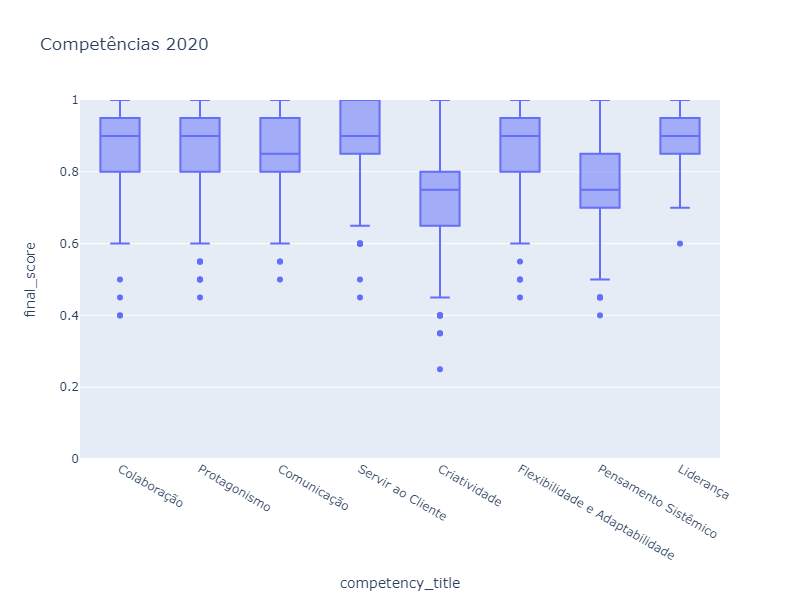

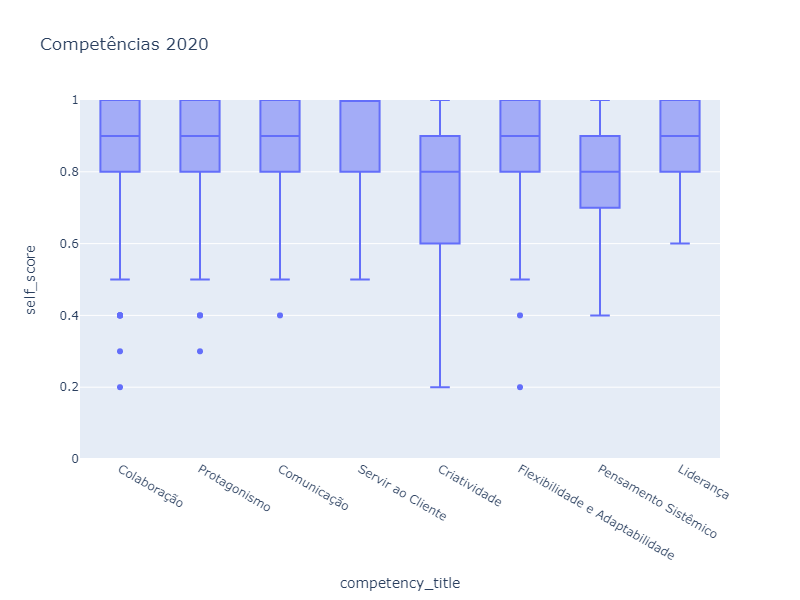

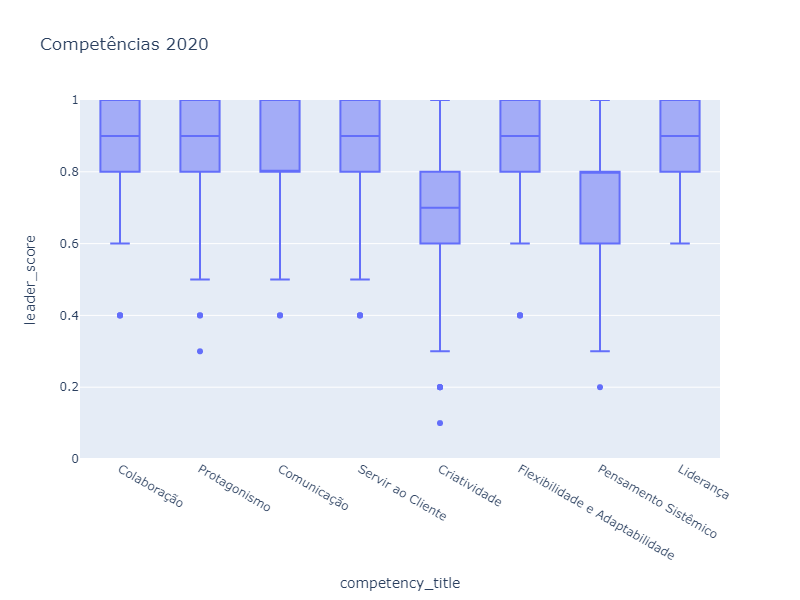

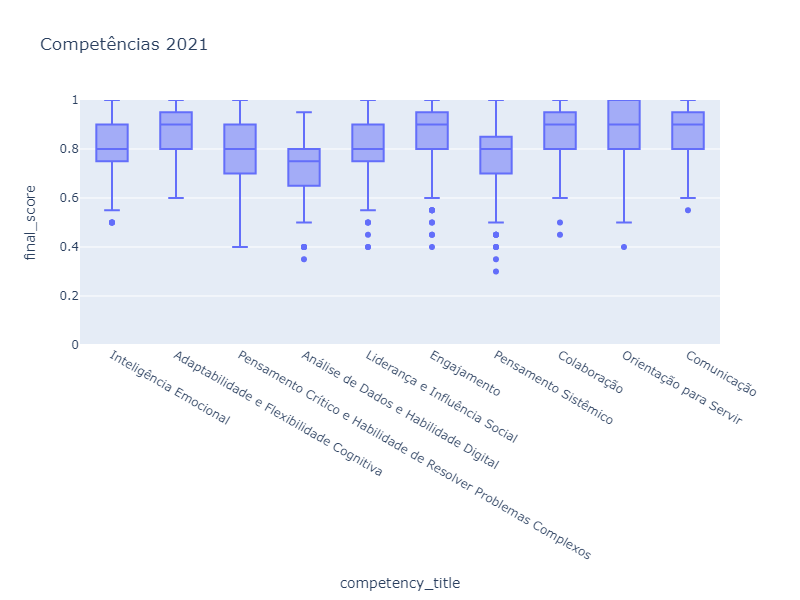

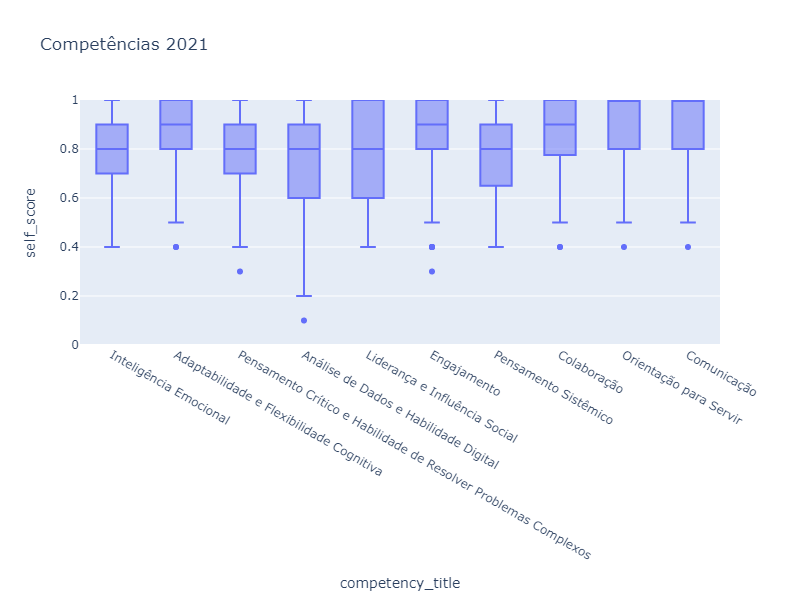

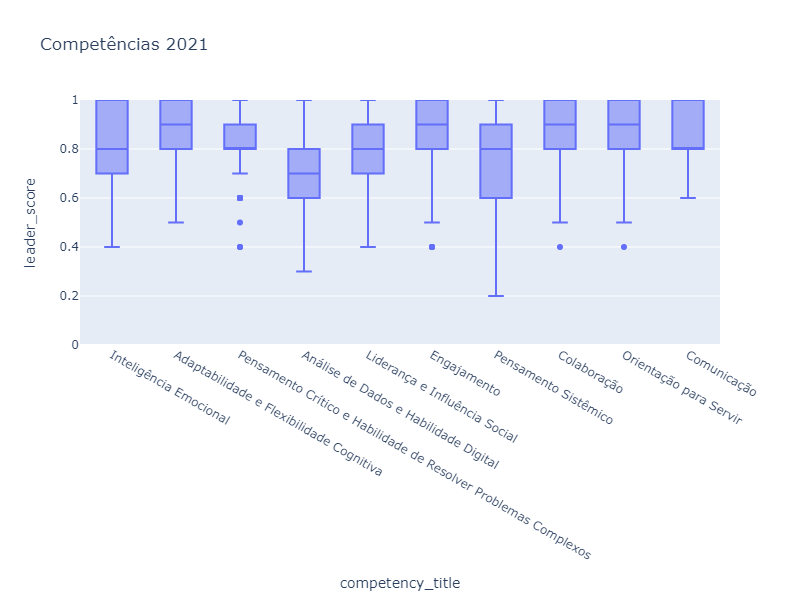

In [118]:
# https://plotly.com/python/box-plots/
# https://operdata.com.br/blog/como-interpretar-um-boxplot/#top

for category_id in df_competencies.category_id.unique():
    data = df_competencies[df_competencies['category_id'] == category_id]

    category_title = data.category_title.to_list()[0]

    for score_type in ['final_score', 'self_score', 'leader_score']:
        fig = plx.box(
            data_frame=data,
            x="competency_title",
            y=score_type,
            title=category_title,
        )

        fig.update_yaxes(range=(0, 1))
        fig.update_layout(height=600, width=800)

        fig_bytes = fig.to_image(format="png")
        img = Image(fig_bytes)
        display(img)


### Calculando o desempenho de cada grupo de competências de cada colaborador
#### Desempenho geral das competências por colaborador (DGCC): AVG(DC*)

In [119]:
df_categories = df_competencies \
    .groupby(['user_id', 'category_id'], as_index=False) \
    .agg({
        'category_title': 'first',
        'self_score': 'mean',
        'leader_score': 'mean',
        'final_score': 'mean'
    })

df_categories.head(n=10)

,user_id,category_id,category_title,self_score,leader_score,final_score
0,18,1,Competências 2020,0.887500,0.925000,0.906250
1,18,8,Competências 2021,0.800000,0.857143,0.828571
2,6432,1,Competências 2020,0.937500,0.987500,0.962500
3,6432,8,Competências 2021,0.914286,0.971429,0.942857
4,6434,1,Competências 2020,0.937500,0.962500,0.950000
5,6434,8,Competências 2021,0.914286,0.900000,0.907143
6,6435,1,Competências 2020,0.862500,0.912500,0.887500
7,6435,8,Competências 2021,0.842857,0.842857,0.842857
8,6440,1,Competências 2020,0.987500,1.000000,0.993750
9,6440,8,Competências 2021,0.985714,0.900000,0.942857


## Verificando a existência de correlação entre as notas de diferentes competências

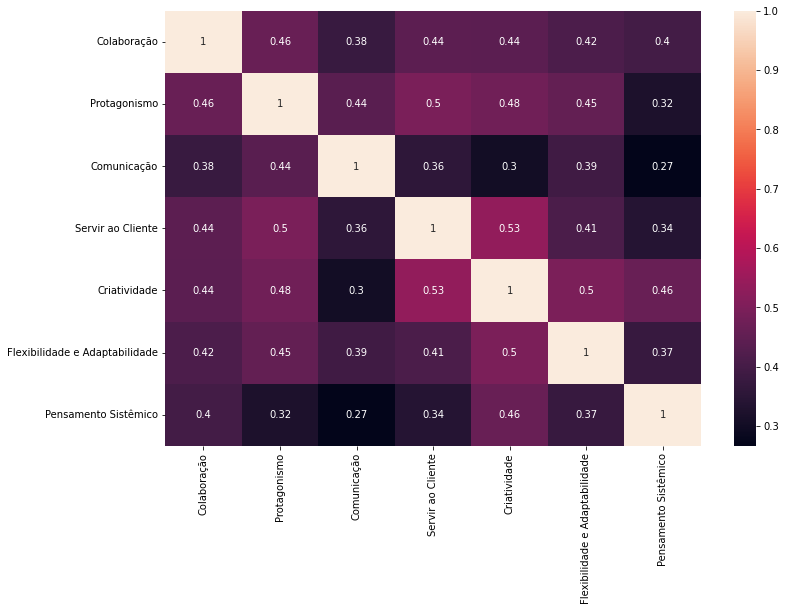

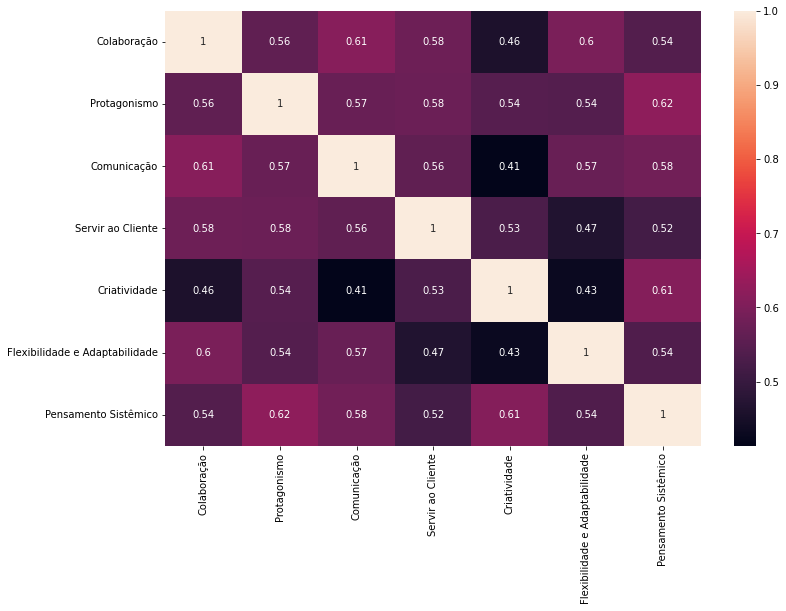

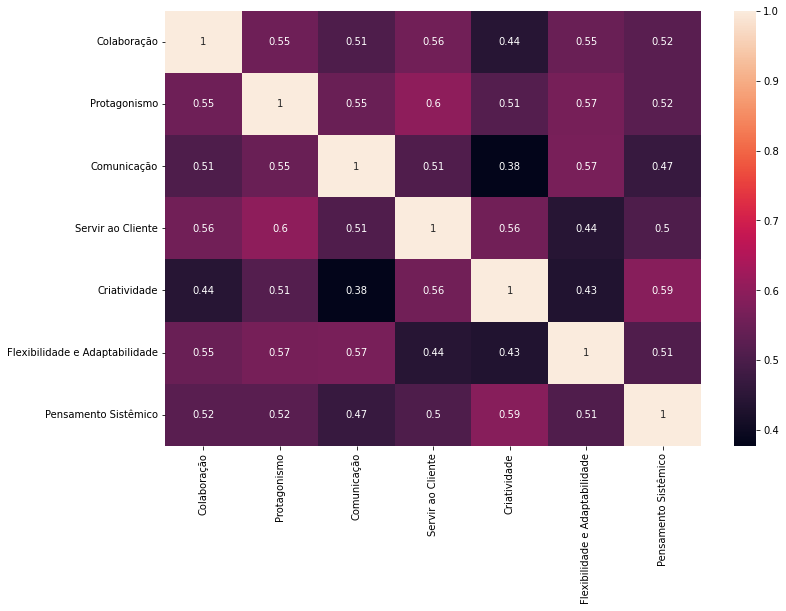

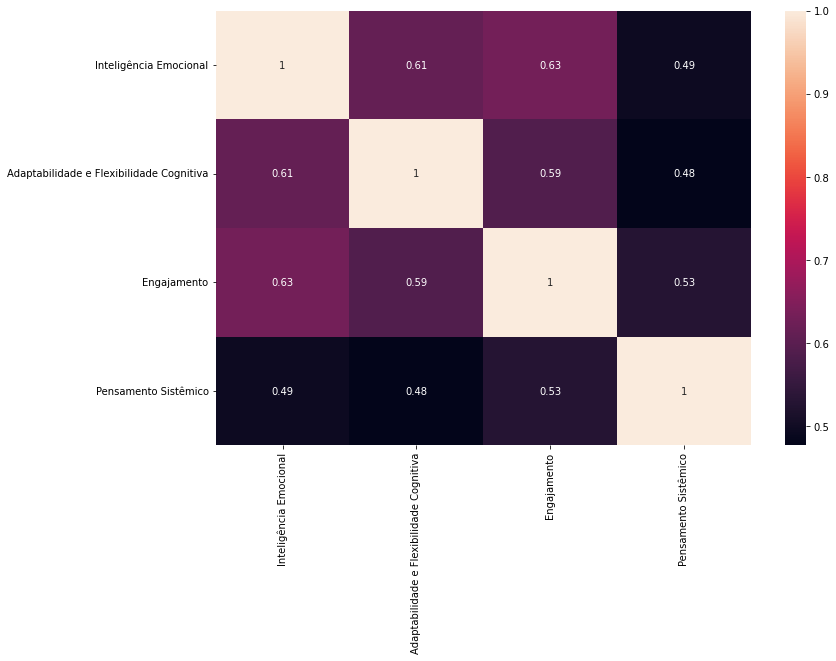

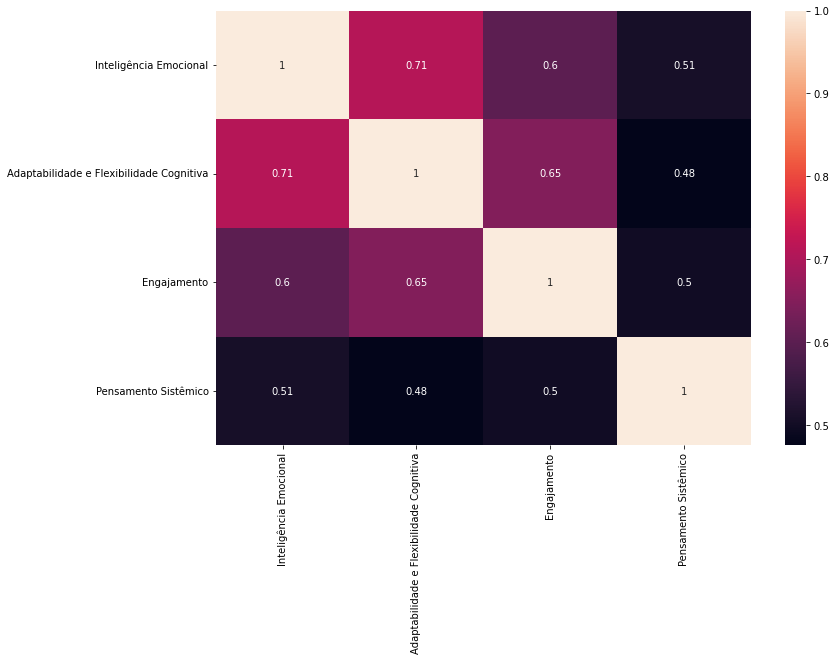

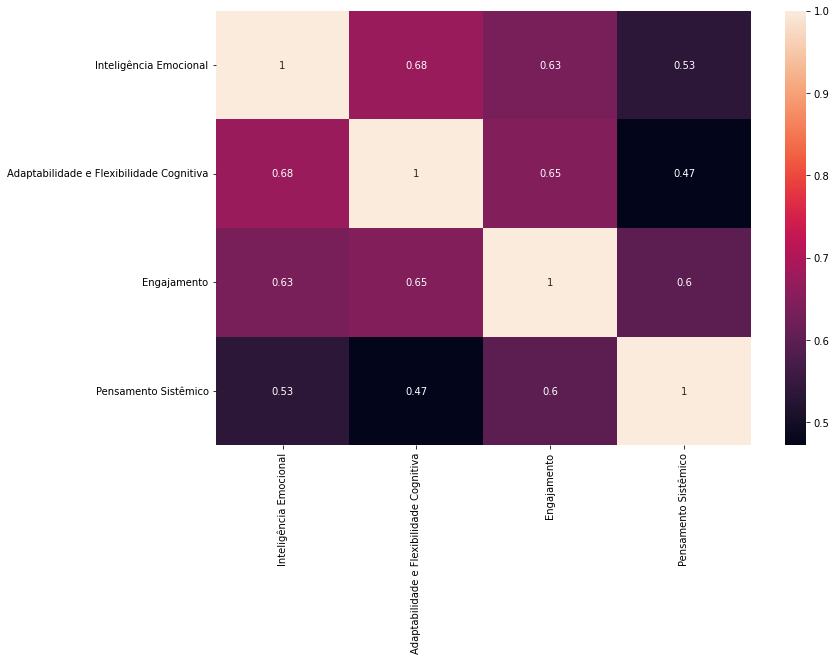

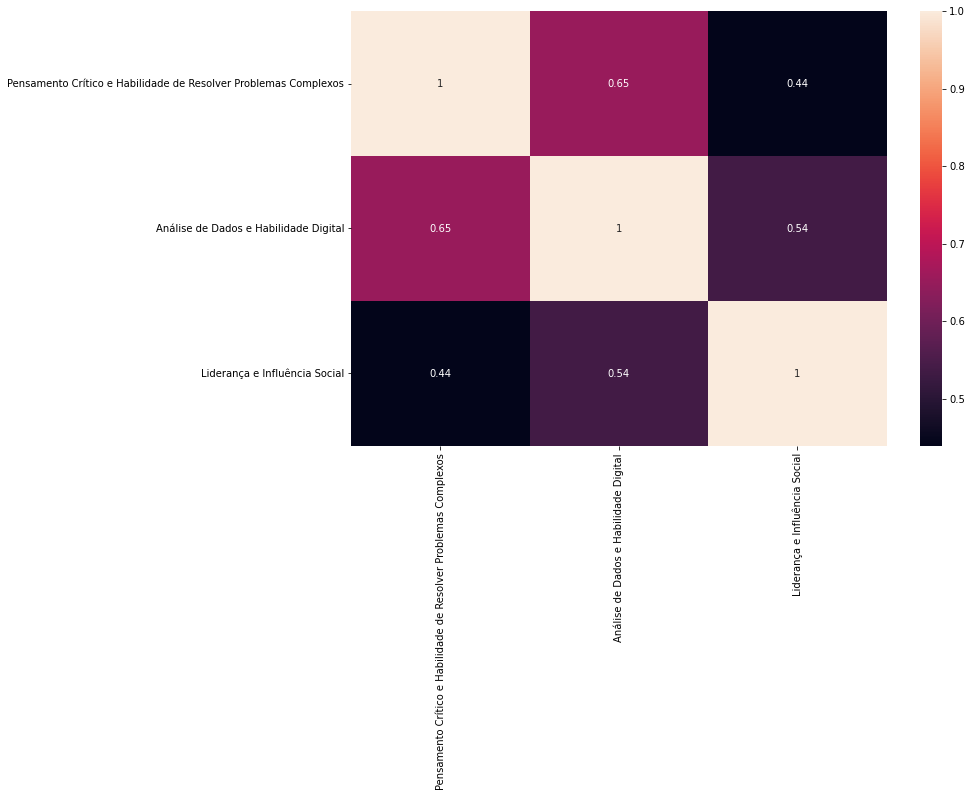

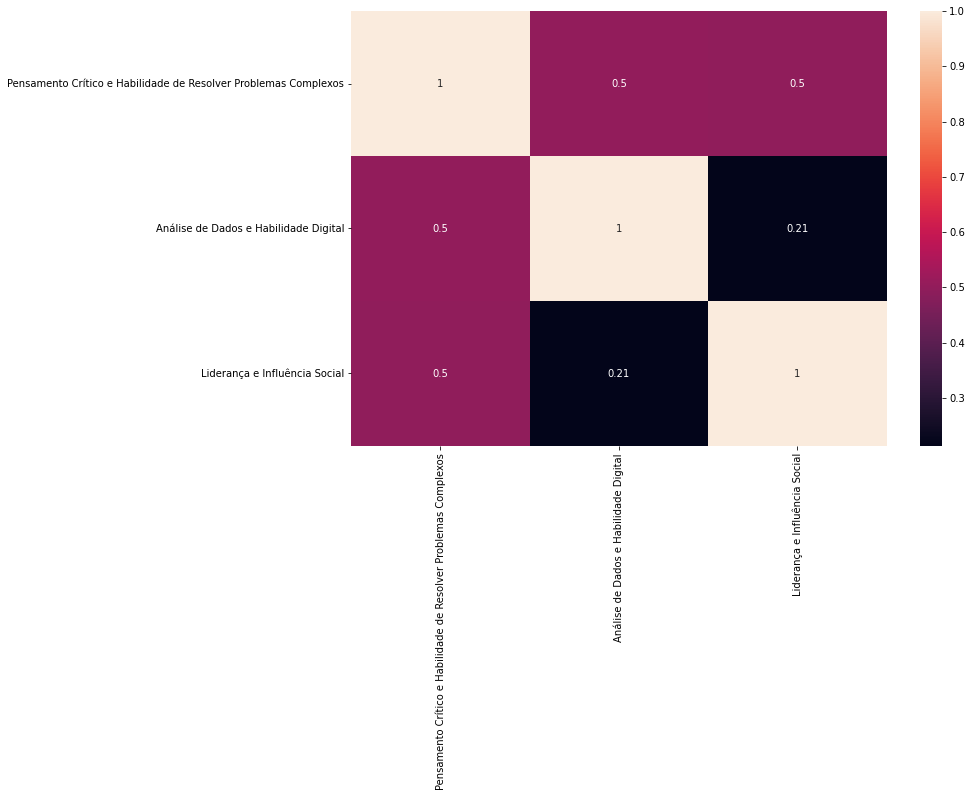

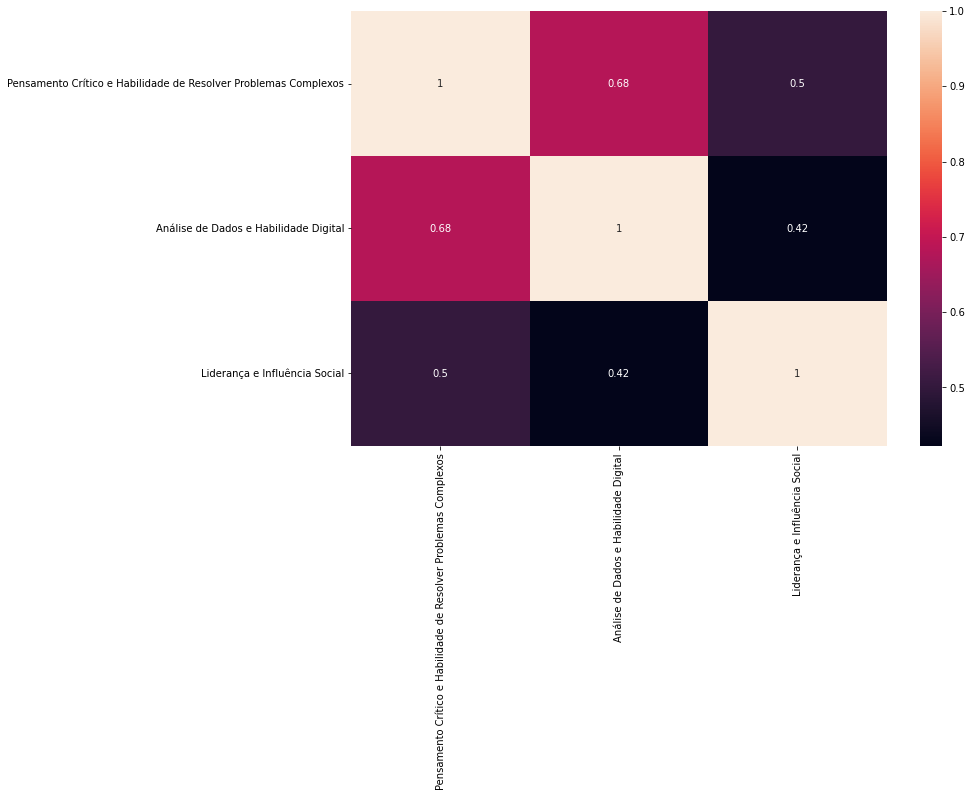

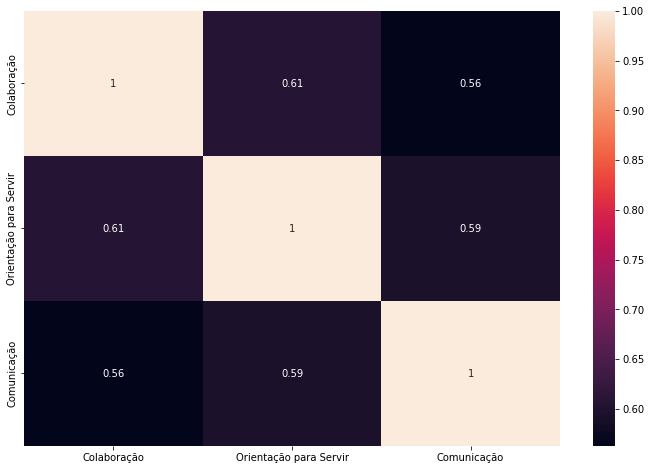

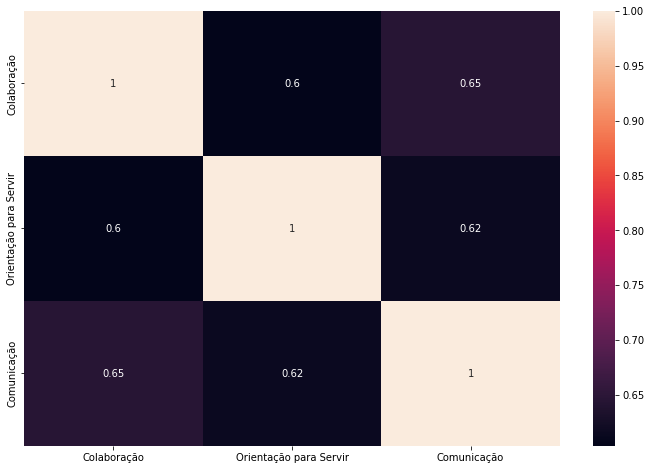

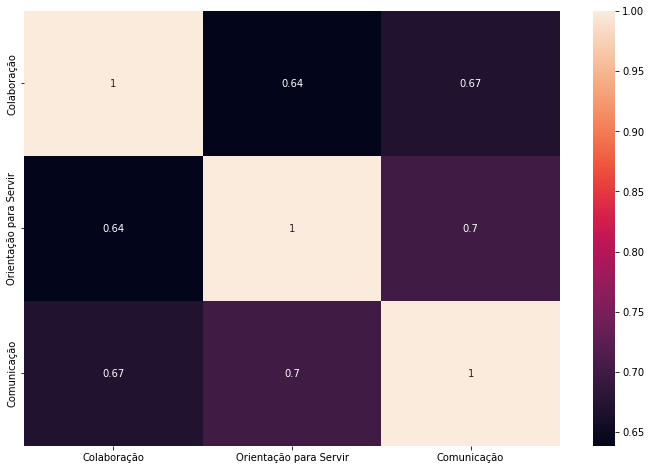

In [120]:
# Filtra um Dataframe pelo valor de uma coluna
def filter_df_by_column_value(df, column, value):
    return df[df[column] == value]

# Filtra apenas as linhas da respectiva competência
def filter_df_by_category_id(id, df):
    return filter_df_by_column_value(df, 'category_id', id)

# Filtra apenas as linhas da respectiva competência
def filter_df_by_competency_id(id, df):
    return filter_df_by_column_value(df, 'competency_id', id)

# Busca o título de uma competência
def get_competency_title(competency_id, df):
    df = filter_df_by_competency_id(competency_id, df)
    return df.competency_title.to_list()[0]


SCORE_TYPES = ['self_score', 'leader_score', 'final_score']

for category_id in df_competencies['category_id'].unique():
    # Pega apenas as linhas que pe
    df_category_competencies = filter_df_by_category_id(category_id, df_competencies)


    category_title = df_category_competencies['category_title'].to_list()[0]

    display(HTML('<h2>{}</h2>'.format(category_title)))

    # Criando um dataframe com a quantidade de linhas por competência, ou seja,
    # a quantidade de colaboradores que possuem uma nota na respectiva competência.
    df_scores_count_by_competency = df_category_competencies.groupby('competency_id') \
        .agg({'self_score': 'count'}) \
        .reset_index() \
        .rename(columns={'self_score': 'count'})


    # Criando um array com as quantidades únicas para filtrar as competências que possuem a mesma quantidade de notas
    # e verificar a existência de correlação entre as notas delas através do Coeficiente de Correlação de Pearson.
    unique_counts = df_scores_count_by_competency['count'].unique()

    for count in unique_counts:

        # Filtrando apenas as notas das competências que possuem a respectiva quantidade de notas
        filtered = df_scores_count_by_competency[df_scores_count_by_competency['count'] == count]

        # Criando um array com os IDs únicos das competências
        competency_ids = filtered['competency_id'].unique()

        all_data = {}

        for score_type in SCORE_TYPES:
            data = {}

            for competency_id in competency_ids:
                competency_title = get_competency_title(competency_id, df_category_competencies)
                df_competency = filter_df_by_competency_id(competency_id, df_category_competencies)
                data[competency_title] = df_competency[score_type].to_list()

            all_data[score_type] = data


        for score_type in SCORE_TYPES:
            df = pd.DataFrame.from_dict(all_data[score_type])

            if len(data) > 1:
                df_correlation = df.corr(method='pearson')

                display(HTML("<h3>Matrix de correlação baseada na coluna {} das competências</h3>".format(score_type)))
                plt.figure(figsize = (12,8))
                sns.heatmap(df_correlation, annot=True)
                plt.show()


#### Desempenho geral de uma competência da empresa (DGUCE): AVG(DC*)

In [121]:
company_competencies = df_competencies.groupby('competency_id', as_index=False) \
    .agg({
        'category_id': 'first',
        'category_title': 'first',
        'competency_title': 'first',
        'self_score': 'mean',
        'leader_score': 'mean',
        'final_score': 'mean'
    })

company_competencies.head(100)

,competency_id,category_id,category_title,competency_title,self_score,leader_score,final_score
0,23,1,Competências 2020,Colaboração,0.858140,0.871364,0.866290
1,24,1,Competências 2020,Protagonismo,0.879535,0.845455,0.859729
2,25,1,Competências 2020,Comunicação,0.888372,0.833864,0.858032
3,26,1,Competências 2020,Servir ao Cliente,0.908372,0.882727,0.894570
4,27,1,Competências 2020,Criatividade,0.749767,0.711591,0.728620
5,28,1,Competências 2020,Flexibilidade e Adaptabilidade,0.850698,0.892273,0.871946
6,29,1,Competências 2020,Pensamento Sistêmico,0.776744,0.745909,0.760407
7,30,1,Competências 2020,Liderança,0.880488,0.895122,0.887805
8,46,8,Competências 2021,Inteligência Emocional,0.810246,0.826491,0.818900
9,49,8,Competências 2021,Adaptabilidade e Flexibilidade Cognitiva,0.861066,0.881301,0.871000


In [122]:
company_competencies.describe()

,competency_id,category_id,self_score,leader_score,final_score
count,18.000000,18.000000,18.000000,18.000000,18.000000
mean,41.666667,4.888889,0.833828,0.828134,0.830076
std,14.564259,3.579170,0.054011,0.059323,0.055392
min,23.000000,1.000000,0.728358,0.711591,0.726439
25%,27.250000,1.000000,0.786381,0.788579,0.790243
50%,47.500000,8.000000,0.850349,0.844865,0.857164
75%,52.750000,8.000000,0.878450,0.874520,0.869822
max,62.000000,8.000000,0.908372,0.895122,0.894570


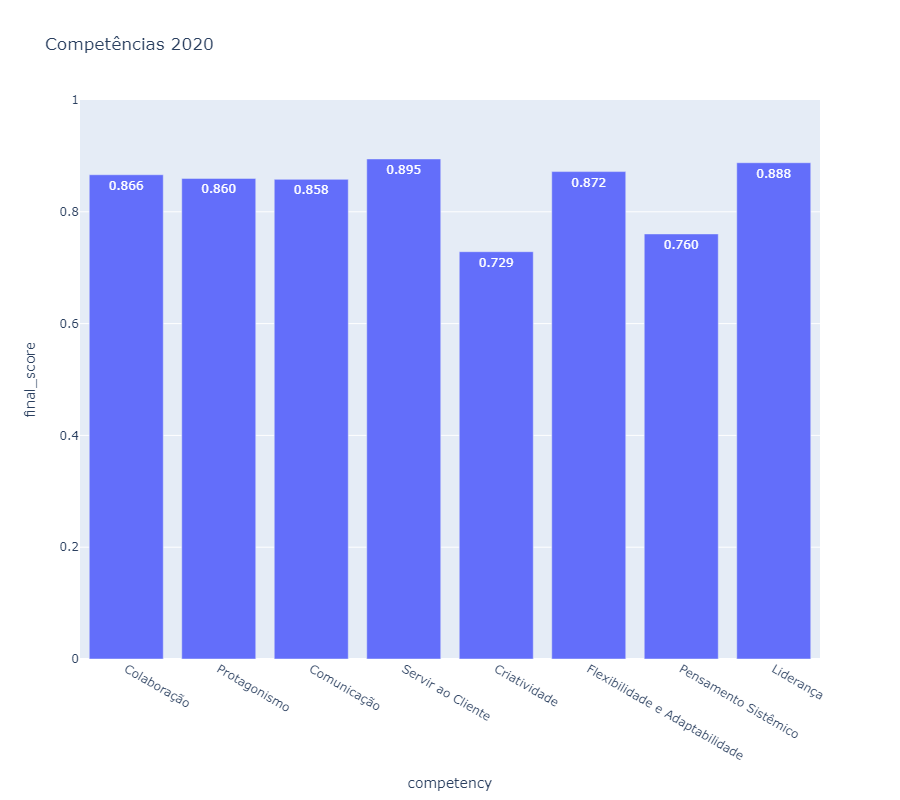

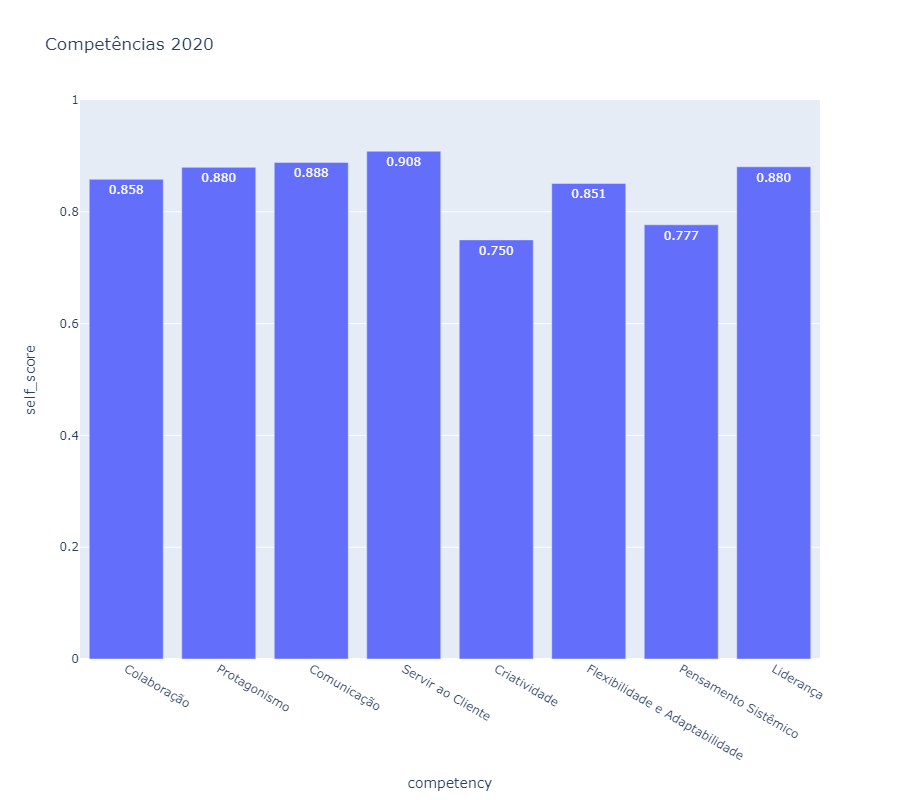

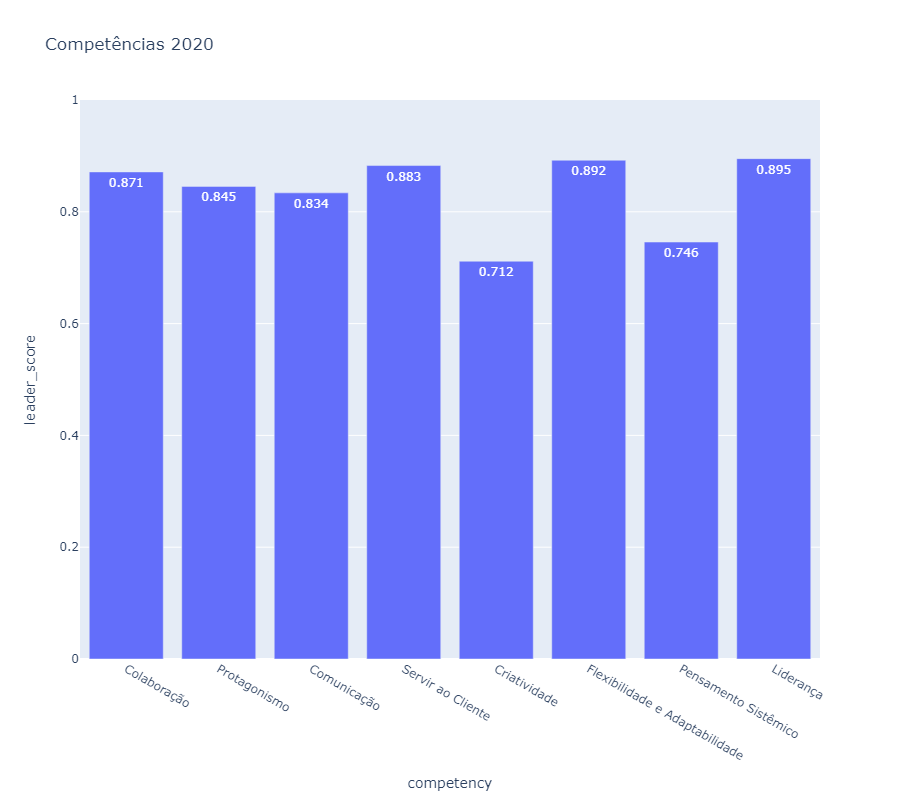

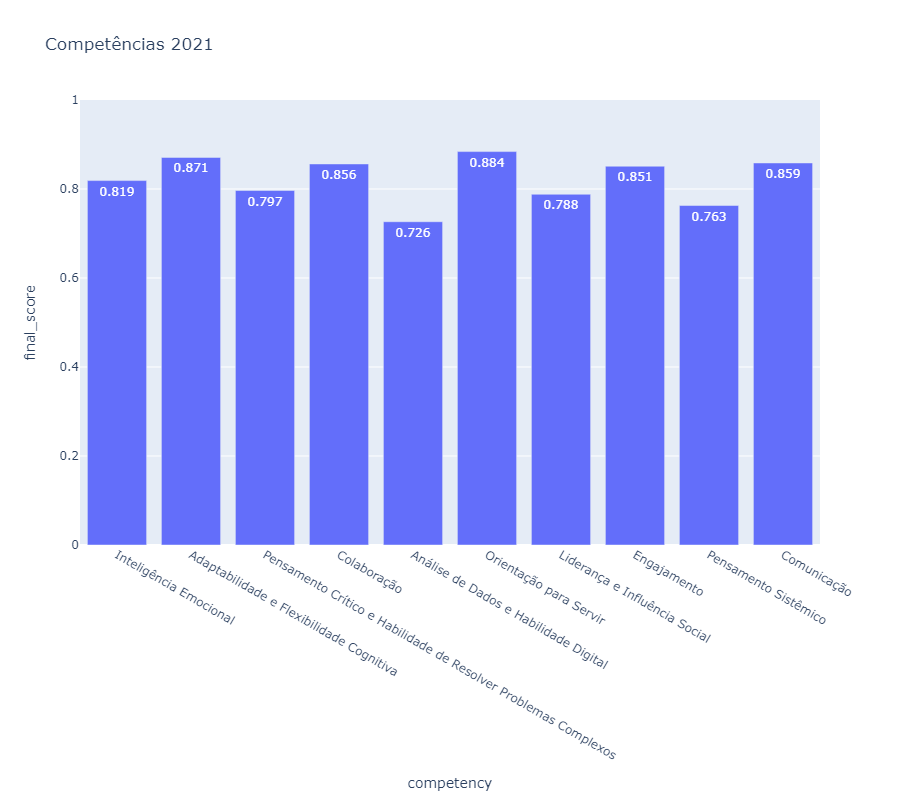

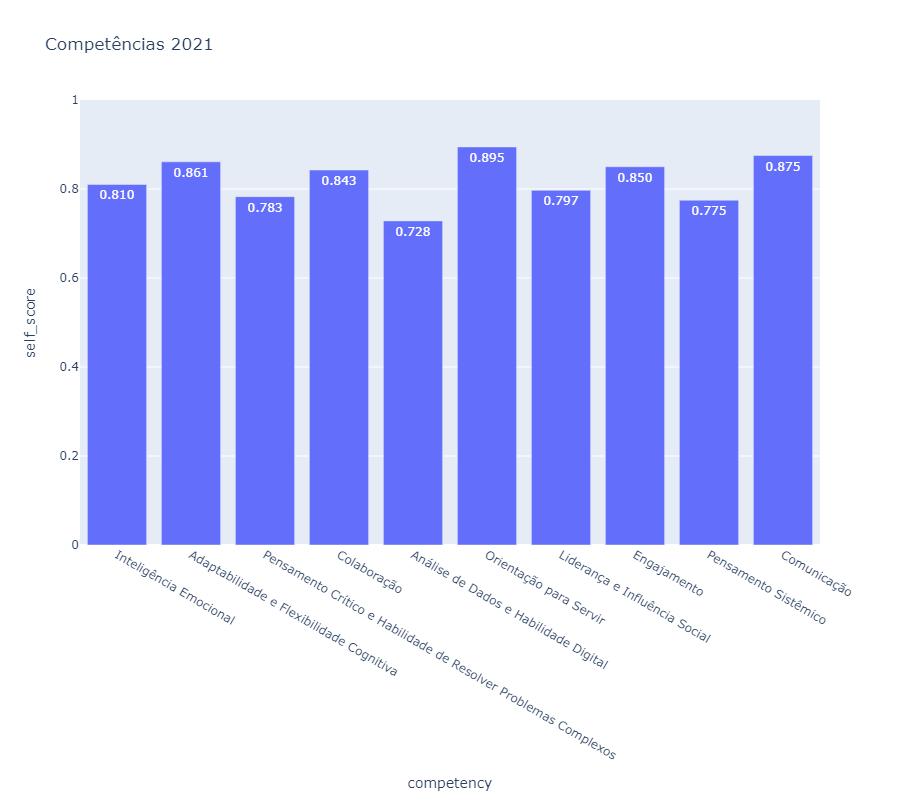

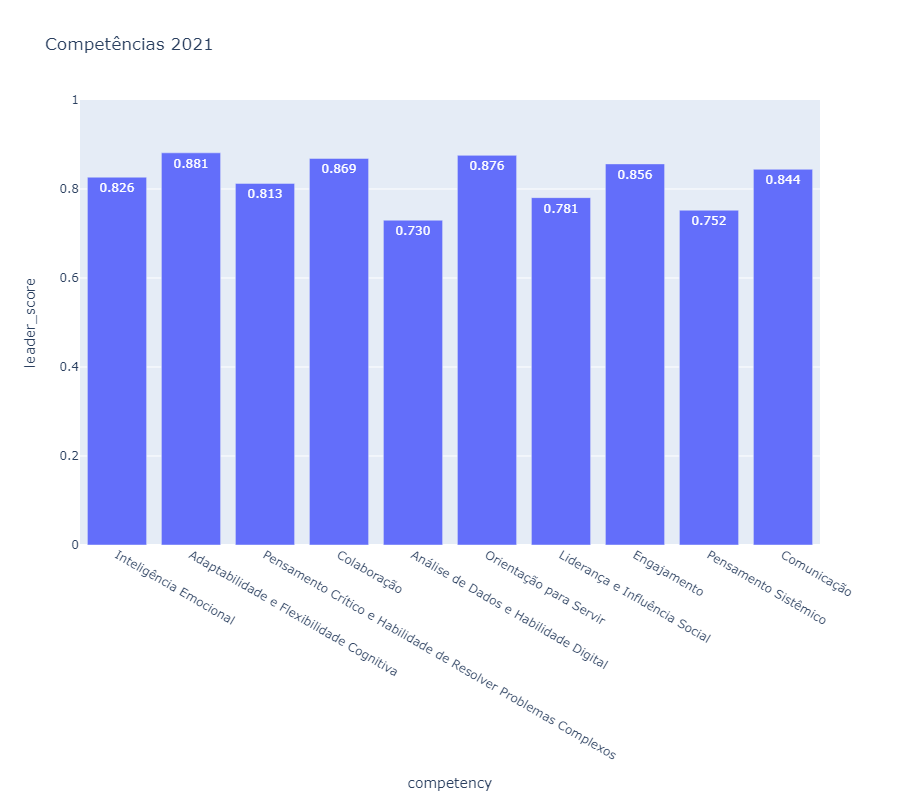

In [123]:
for category_id in df_categories.category_id.unique():
    data = company_competencies[
        company_competencies['category_id'] == category_id
    ]

    category_title = data.category_title.to_list()[0]

    for score_type in ['final_score', 'self_score', 'leader_score']:
        fig = plx.bar(
            x=data.competency_title,
            y=data[score_type],
            title=category_title,
            labels={'x': 'competency', 'y': score_type},
            orientation='v',
        )

        fig.update_traces(texttemplate="%{y:.3f}")
        fig.update_yaxes(range=(0, 1))
        fig.update_layout(height=800, width=900)

        # Mostrando a figura gerada dessa maneira faz com ela apareça quando é gerado o HTML do notebook
        # https://plotly.com/python/static-image-export/
        fig_bytes = fig.to_image(format="png")
        img = Image(fig_bytes)
        display(img)


#### Desempenho geral das competências da empresa (DGCE): AVG(DGUCE*)

In [124]:
company_categories = df_categories.groupby('category_id', as_index=False) \
    .agg({
        'category_title': 'first',
        'self_score': 'mean',
        'leader_score': 'mean',
        'final_score': 'mean'
    })

company_categories.head()

,category_id,category_title,self_score,leader_score,final_score
0,1,Competências 2020,0.844103,0.826071,0.833973
1,8,Competências 2021,0.822568,0.823564,0.822750


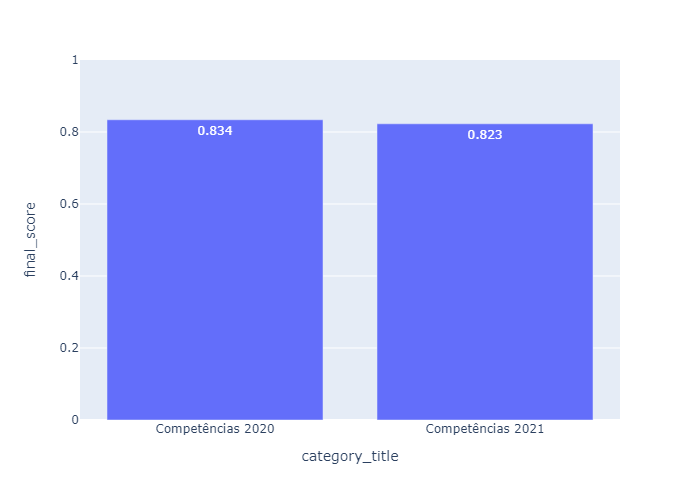

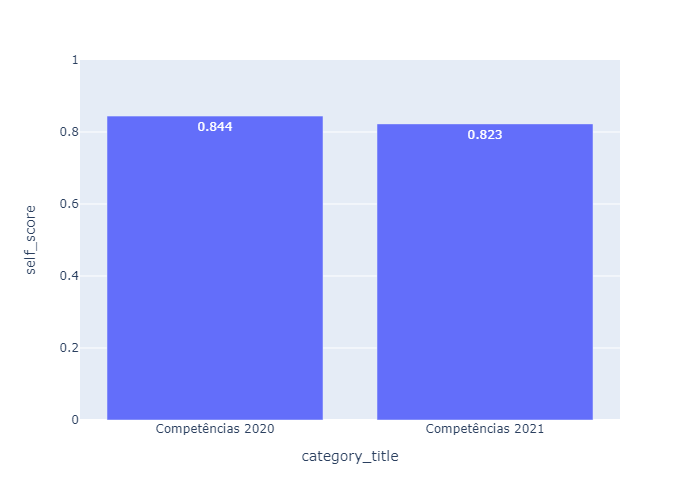

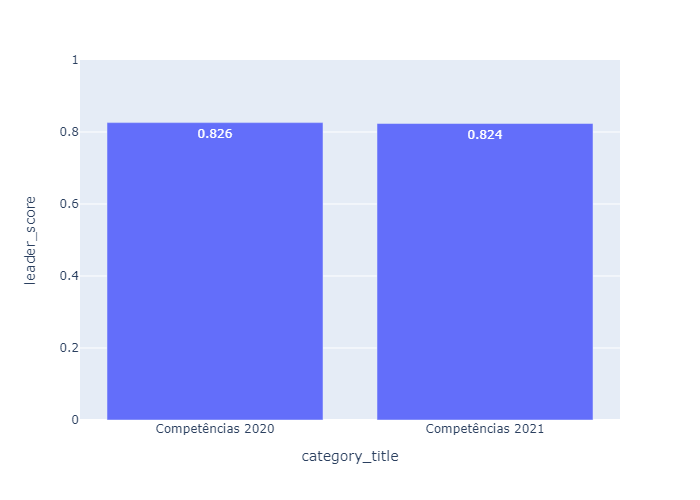

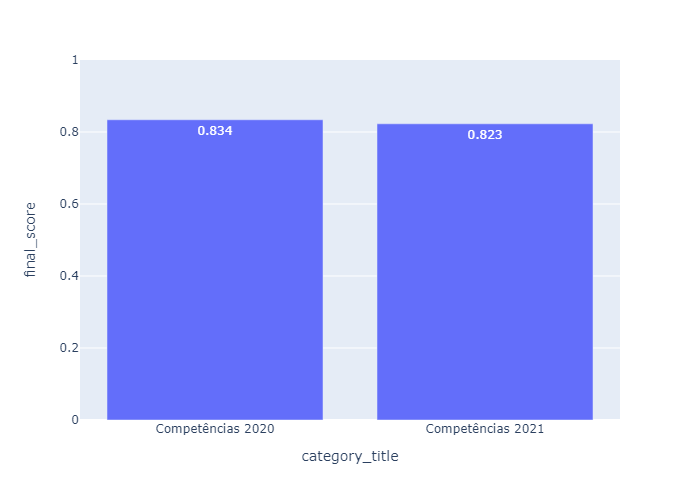

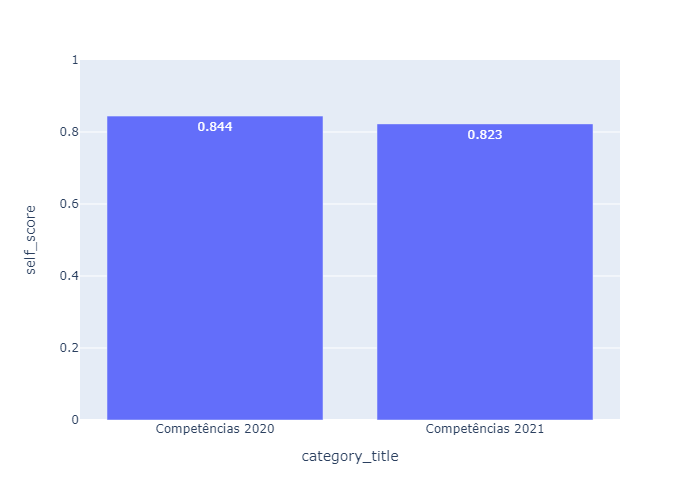

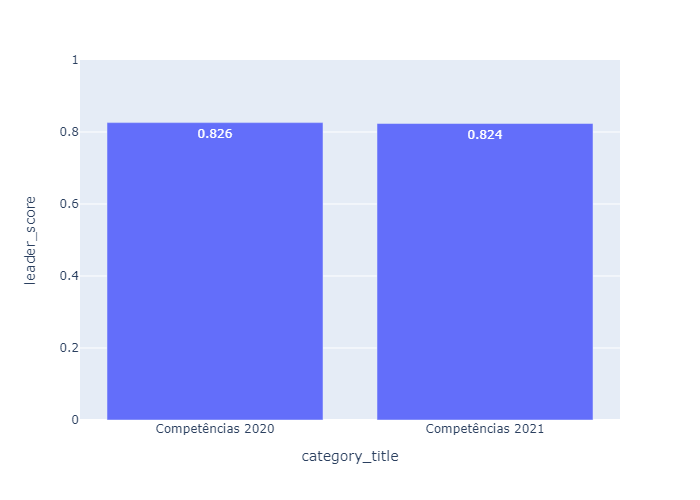

In [125]:
for category_id in df_categories.category_id.unique():
    data = company_categories[
        company_categories['category_id'] == category_id
    ]

    for score_type in ['final_score', 'self_score', 'leader_score']:
        fig = plx.bar(
            data_frame=company_categories,
            x='category_title',
            y=score_type,
        )

        fig.update_traces(texttemplate="%{y:.3f}")
        fig.update_yaxes(range=(0, 1))

        # Mostrando a figura gerada dessa maneira ela aparece quando é gerado o HTML do notebook
        # https://plotly.com/python/static-image-export/
        fig_bytes = fig.to_image(format="png")
        img = Image(fig_bytes)
        display(img)
